In [ ]:
# MLR

In [ ]:
# libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
# data loading

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.corr()['total_bedrooms']

longitude             0.071802
latitude             -0.069373
housing_median_age   -0.320434
total_rooms           0.928403
total_bedrooms        1.000000
population            0.881169
households            0.980920
median_income        -0.013495
median_house_value    0.045783
Name: total_bedrooms, dtype: float64

In [ ]:
bedrooms = df['total_bedrooms']
df = df.drop(['total_bedrooms','longitude','latitude','housing_median_age','median_income','median_house_value'],axis = 1)
df['bedrooms'] = bedrooms
df

,total_rooms,population,households,bedrooms
0,5612.0,1015.0,472.0,1283.0
1,7650.0,1129.0,463.0,1901.0
2,720.0,333.0,117.0,174.0
3,1501.0,515.0,226.0,337.0
4,1454.0,624.0,262.0,326.0
...,...,...,...,...
16995,2217.0,907.0,369.0,394.0
16996,2349.0,1194.0,465.0,528.0
16997,2677.0,1244.0,456.0,531.0
16998,2672.0,1298.0,478.0,552.0


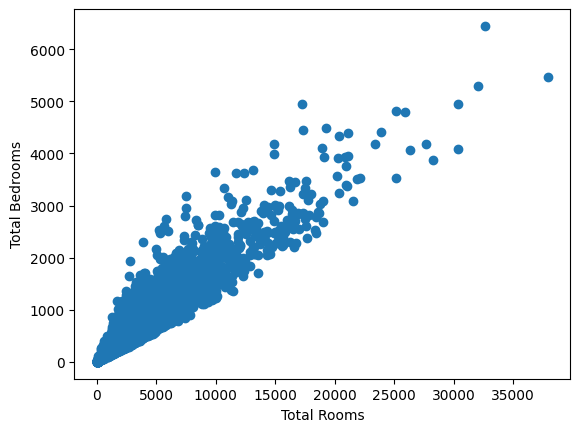

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['total_rooms'],df['bedrooms'])
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.show()

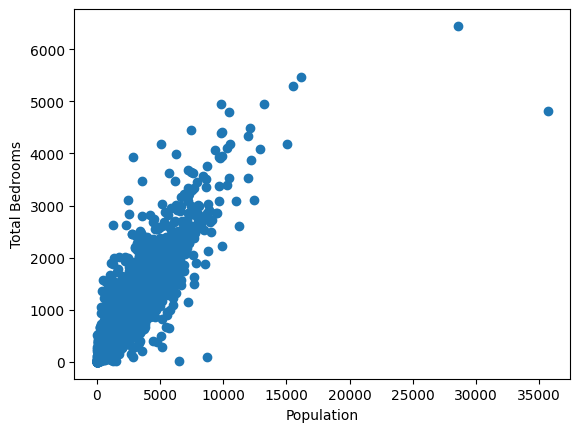

In [ ]:
plt.scatter(df['population'],df['bedrooms'])
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.show()

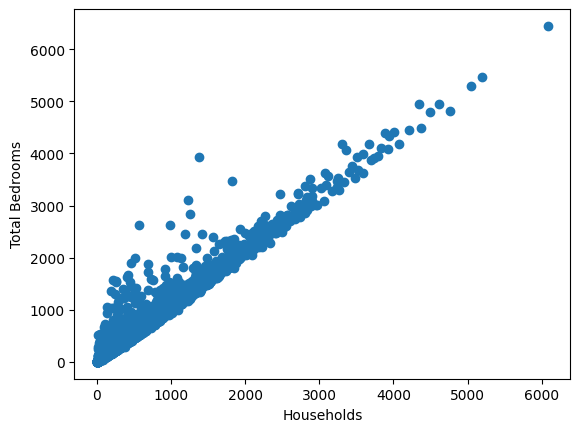

In [ ]:
plt.scatter(df['households'],df['bedrooms'])
plt.xlabel('Households')
plt.ylabel('Total Bedrooms')
plt.show()

In [ ]:
df.head()

,total_rooms,population,households,bedrooms
0,5612.0,1015.0,472.0,1283.0
1,7650.0,1129.0,463.0,1901.0
2,720.0,333.0,117.0,174.0
3,1501.0,515.0,226.0,337.0
4,1454.0,624.0,262.0,326.0


In [ ]:
#separate X and Y data

X = df.drop(labels='bedrooms',axis = 1)
Y = df['bedrooms']
print(X.head())
print(Y.head())

   total_rooms  population  households
0       5612.0      1015.0       472.0
1       7650.0      1129.0       463.0
2        720.0       333.0       117.0
3       1501.0       515.0       226.0
4       1454.0       624.0       262.0
0    1283.0
1    1901.0
2     174.0
3     337.0
4     326.0
Name: bedrooms, dtype: float64


In [ ]:
print(Y)
print(type(Y))

0        1283.0
1        1901.0
2         174.0
3         337.0
4         326.0
          ...  
16995     394.0
16996     528.0
16997     531.0
16998     552.0
16999     300.0
Name: bedrooms, Length: 17000, dtype: float64
<class 'pandas.core.series.Series'>


In [ ]:
# CREATE MATRIX X AND VECTOR Y

Y = np.matrix(Y)
print(Y)
print(type(Y))

[[1283. 1901.  174. ...  531.  552.  300.]]
<class 'numpy.matrix'>


In [ ]:
print(Y.shape)

(1, 17000)


In [ ]:
Y = np.transpose(Y)

In [ ]:
print(Y)

[[1283.]
 [1901.]
 [ 174.]
 ...
 [ 531.]
 [ 552.]
 [ 300.]]


In [ ]:
print(Y.shape)

(17000, 1)


In [ ]:
print(X)

       total_rooms  population  households
0           5612.0      1015.0       472.0
1           7650.0      1129.0       463.0
2            720.0       333.0       117.0
3           1501.0       515.0       226.0
4           1454.0       624.0       262.0
...            ...         ...         ...
16995       2217.0       907.0       369.0
16996       2349.0      1194.0       465.0
16997       2677.0      1244.0       456.0
16998       2672.0      1298.0       478.0
16999       1820.0       806.0       270.0

[17000 rows x 3 columns]


In [ ]:
# convert X to matrix

X = np.matrix(X)

In [ ]:
print(X)

[[5612. 1015.  472.]
 [7650. 1129.  463.]
 [ 720.  333.  117.]
 ...
 [2677. 1244.  456.]
 [2672. 1298.  478.]
 [1820.  806.  270.]]


In [ ]:
# create a matrix of ones of shape equal to the length of X

c = np.ones(len(X))

In [ ]:
print(c)

[1. 1. 1. ... 1. 1. 1.]


In [ ]:
C = np.transpose(np.matrix(c))

In [ ]:
print(C)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
print(C.shape)

(17000, 1)


In [ ]:
X = np.append(C,X,axis=1)

In [ ]:
print(X)

[[1.000e+00 5.612e+03 1.015e+03 4.720e+02]
 [1.000e+00 7.650e+03 1.129e+03 4.630e+02]
 [1.000e+00 7.200e+02 3.330e+02 1.170e+02]
 ...
 [1.000e+00 2.677e+03 1.244e+03 4.560e+02]
 [1.000e+00 2.672e+03 1.298e+03 4.780e+02]
 [1.000e+00 1.820e+03 8.060e+02 2.700e+02]]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

In [ ]:
print(Y_test.shape)

(4250, 1)


In [ ]:
# Compute betacap = (XtransposeX)inverse . (XtransposeY)

In [ ]:
temp1 = np.dot(np.transpose(X_train),X_train)

In [ ]:
print(temp1)

[[1.27500000e+04 3.37343550e+07 1.82510700e+07 6.38455600e+06]
 [3.37343550e+07 1.51304778e+11 7.67271421e+10 2.69276137e+10]
 [1.82510700e+07 7.67271421e+10 4.37820153e+10 1.44243392e+10]
 [6.38455600e+06 2.69276137e+10 1.44243392e+10 5.11249415e+09]]


In [ ]:
temp1 = np.linalg.pinv(temp1)

In [ ]:
print(temp1)

[[ 2.10159107e-04 -1.10086795e-09 -1.59253912e-08 -2.11719674e-07]
 [-1.10086795e-09  1.07621932e-10 -2.62106692e-11 -4.91521673e-10]
 [-1.59253912e-08 -2.62106692e-11  3.31745654e-10 -7.78043828e-10]
 [-2.11719674e-07 -4.91521673e-10 -7.78043828e-10  5.24401772e-09]]


In [ ]:
temp2 = np.dot(np.transpose(X_train),Y_train)

In [ ]:
print(temp2)

[[6.86692500e+06]
 [2.92771195e+10]
 [1.54361737e+10]
 [5.49388898e+09]]


In [ ]:
Beta = np.dot(temp1,temp2)

In [ ]:
print(Beta)

[[ 1.92509601]
 [ 0.03834265]
 [-0.03033425]
 [ 0.95582964]]


In [ ]:
print(X_test[1])

[[1.000e+00 1.479e+03 7.410e+02 2.450e+02]]


In [ ]:
print(Y_test[1])

[[251.]]


In [ ]:
#compute Betacaptranspose . xtilde

In [ ]:
print(np.dot(X_test[1],Beta))

[[270.33446288]]


In [ ]:
yhat = np.dot(X_test,Beta)

In [ ]:
print(sum(np.abs(Y_test-yhat)))

[[168420.31952509]]


In [ ]:
pred = np.dot(X_test,Beta)
err = np.array(Y_test-pred)

In [ ]:
print(np.sum(err*err))

22086638.569702927


#Logistic_regression

In [3]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


seprate x and y

In [8]:
x=df.drop('Outcome',axis=1)
y=pd.DataFrame(df['Outcome'])

In [9]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
x=(x-np.mean(x))/(np.std(x))

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [11]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


2.Compute y,X

In [12]:
x.insert(0,'new',1)

In [13]:
x.head()

,new,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,1,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,1,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [15]:
x_train

,new,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
580,1,-1.141852,0.942215,1.080200,1.597279,-0.692891,1.282826,-0.304658,-1.041549
418,1,-0.844885,-1.185991,-0.057150,-1.288212,-0.692891,-1.750544,0.459432,-0.531023
764,1,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
363,1,0.046014,0.785730,0.459827,-1.288212,-0.692891,0.825917,0.145339,2.872487
757,1,-1.141852,0.065895,0.149641,-1.288212,-0.692891,0.546695,-0.645932,1.596171
...,...,...,...,...,...,...,...,...,...
763,1,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
192,1,0.936914,1.192592,-0.160546,-1.288212,-0.692891,-0.202129,-0.268417,0.234767
629,1,0.046014,-0.841722,-0.212243,0.091805,-0.692891,-0.925569,-0.978145,-1.041549
559,1,2.124780,-1.123396,0.253036,-1.288212,-0.692891,-0.240205,-0.519087,0.149679


In [17]:
print(f"x_train.shape={x_train.shape}")
print(f"x_test.shape={x_test.shape}")
print(f"y_train.shape={y_train.shape}")
print(f"y_test.shape={y_test.shape}")

x_train.shape=(537, 9)
x_test.shape=(231, 9)
y_train.shape=(537, 1)
y_test.shape=(231, 1)


In [18]:
x

,new,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,1,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,1,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...,...
763,1,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,1,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,1,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,1,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [19]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [20]:
alpha=0.01
beta_old=np.full(x_train.shape[1],0.01)
beta_old=beta_old.reshape(9,1)

In [21]:
beta_old

array([[0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01]])

In [22]:
beta_old.shape

(9, 1)

In [23]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [28]:
p=np.zeros(x_train.shape[0]).reshape(x_train.shape[0],1)
while(True):
  for i in range(len(x_train)):
    z=np.matmul(x_train[i],beta_old)
    p[i]=1.0/(1.0+np.exp(-z))
  beta_new=beta_old+alpha*(np.matmul(x_train.T,(y_train-p)))
  del_beta=np.linalg.norm(beta_new-beta_old)
  beta_old=beta_new.copy()
  print("beta:",del_beta)
  if(del_beta<1):
    weights=(beta_new)
    break

beta: 0.1923329307774466


In [29]:
weights

array([[-0.85608472],
       [ 0.29088924],
       [ 1.07670781],
       [-0.18302482],
       [ 0.06591039],
       [-0.07348013],
       [ 0.7382001 ],
       [ 0.27096854],
       [ 0.32969955]])

In [30]:
np.matmul(x_test,weights).shape

(231, 1)

In [31]:
p_f=np.zeros(x_train.shape[0]).reshape(x_train.shape[0],1)

In [32]:
print(weights.shape)
print(x_test.shape)

(9, 1)
(231, 9)


In [33]:
z_f=np.matmul(x_test,weights)
p_f=1.0/(1.0+np.exp(-(np.matmul(x_test,weights))))

In [34]:
for i in range(len(p_f)):
  if p_f[i]>0.5:
    p_f[i]=1
  else:
    p_f[i]=0

In [35]:
p_f

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,p_f)

0.7878787878787878

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf=LogisticRegression().fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
y_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)